Regresion No Lineal usando un Perceptrón Continuo
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 

---

# Definición del problema

Se desea contruir un modelo de regresión para los siguientes datos:
 
     #      x          d
    ----------------------
     1  -6.1807  -0.0089 
     2   1.9568   0.9799 
     3   1.7484   0.9843 
     4   1.9741   1.0012 
     5   5.7746   1.0192 
     6   2.2450   0.9977 
     7  -7.8481  -0.0102 
     8  -4.2792   0.0095 
     9   2.6573   0.9832 
    10   0.2280   1.0441 
    11   3.0975   1.0027 
    12   0.7196   0.9886 
    13  -3.4763   0.1155 
    14   6.7749   1.0092 
    15  -3.3229   0.1478 
    16   5.3967   0.9710 
    17  -3.4204   0.1484 
    18  -3.7309   0.0581 
    19  -5.0124   0.0062 
    20  -4.2844   0.0087


![alt](images/PerceptronRegresion-01.png)

# Metodología de Solución

Este problema será resuelto mediante un perceptrón continuo. En el perceptrón continuo, la función de activación es del tipo sigmoidea-logística en vez de la función de paso duro.

* Función tangente hiperbólica:

$$\tanh⁡(v) = \frac{\sinh⁡(v)}{\cosh⁡(v)} = \frac{\exp⁡(v)-\exp⁡(-v)}{\exp⁡(v)+\exp⁡(-v)}=\frac{1-\exp⁡(-2v)}{1+\exp⁡(2v)} $$

* Función sigmoidea:

$$\sigma (v) = \frac{1}{1+\exp(-v)}$$



![alt](images/PerceptronRegresion-02.png)

---
**Ejercicio.--** Demuestre que:

$$\tanh(v) = 2 * \sigma(2 * v) - 1$$

---

La función de activación $\sigma(.)$ mapea la entrada $[x_1,x_2,…,x_n ] \in R^n$ al rango $[0,1]$ para señales unipolares y al rango $[-1,+1]$ para señales bipolares. Se asume que $\sigma(.) \in [-1,+1]$.

$\sigma(.)$ es una función sigmoidal continua y diferenciable, tal que:

* $\sigma(u) \to \pm 1$ cuando $u \to \pm \infty$


* $\sigma(u) \in [-1,+1]$


* $\sigma(u)=$0  en un único punto $u=0$.


* $\sigma'(u)>0$ y $\sigma'(u) \to 0$ cuando $u \to \pm \infty$ (monótonamente creciente)


* $\sigma'(u)$ tiene un máximo global $>0$.


### Algoritmo de propagación hacia atrás del error (backpropagation)

Para estimar los valores de los pesos asociados a las conexiones se usa el algoritmo de backpropagation. En este caso, el error instantaneo se define como:


$$e(k)=d(k)-y(k)=d(k)-\sigma \left( \mathbf{w}^T (k) \mathbf{x}(k) \right) $$

$$=d(k)- \sigma \left( \sum_{i=1}^n w_i(k) x_i(k) \right)$$


El gradiente del error cuadrático medio es:

$$\frac{\partial}{\partial \mathbf{w}(k)} [e^2(k)] = 
2 e(k) \frac{\partial}{\partial \mathbf{w}(k)} [e(k)] =
2 e(k) \left[ - \frac{\partial y(k)}{\partial \mathbf{w}(k)}  \right]=
2 e(k) \left[ -\sigma' (s(k)) \frac{\partial s(k)}{\partial \mathbf{w} } \right] = 
-2 e(k) \sigma' \left(s(k) \right) \mathbf{x}(k)
$$


Aplicando el método del descenso acelerado para minimizar el error cuadrático medio se obtiene:

$$
\mathbf{w}(k+1) = \mathbf{w}(k) - \mu \frac{\partial}{\partial\mathbf{w}(k)} \left[ e^2(k)\right] =
\mathbf{w}(k) + 2 \mu e(k) \sigma' \left(s(k) \right) \mathbf{x}(k)
$$

Las derivadas de la función de activación son las siguientes

* Para la función logistica-sigmoidea:

$$
\sigma (u) = \frac{1}{1+\exp(-u)}, \quad  \frac{\partial }{\partial u} \sigma(u)=\sigma(u)[1-\sigma(u)]
$$


* Para la función $\tanh$:

$$
\sigma(u) = \tanh(u) = \frac{\exp(u) - \exp(-u)}{\exp(u) + \exp(-u)}, \quad \frac{d}{du} \sigma(u) = 1 - \sigma(u)^2
$$

---
**Ejercicio.--** Demuestre las dos derivadas anteriores.

---

La función de error puede ser muy compleja, lo que dificulta enormemente el proceso de optimización.

![alt](images/PerceptronRegresion-03.png)

### Solución al problema propuesto usando `numpy`

Para solucionar el problema se usará un perceptrón continuo que usa la función logística. La fórmula de correción de los pesos es la siguiente:

$$
\mathbf{w}(k+1) = 
\mathbf{w}(k) + 2 \mu e(k) \cdot \sigma(u)[1-\sigma(u)] \cdot  \mathbf{x}(k)
$$

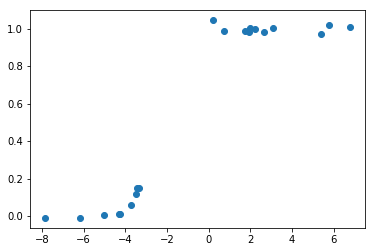

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

##
## datos del problema propuesto
##
x = np.array([-6.1807,   1.9568,   1.7484,   1.9741,   5.7746,
               2.2450,  -7.8481,  -4.2792,   2.6573,   0.2280,
               3.0975,   0.7196,  -3.4763,   6.7749,  -3.3229,
               5.3967,  -3.4204,  -3.7309,  -5.0124,  -4.2844])

d = np.array([-0.0089,   0.9799,   0.9843,   1.0012,   1.0192, 
               0.9977,  -0.0102,   0.0095,   0.9832,   1.0441,
               1.0027,   0.9886,   0.1155,   1.0092,   0.1478, 
               0.9710,   0.1484,   0.0581,   0.0062,   0.0087])

plt.plot(x.tolist(), d.tolist(), 'o');

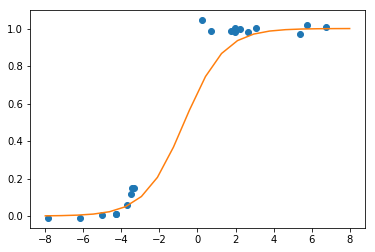

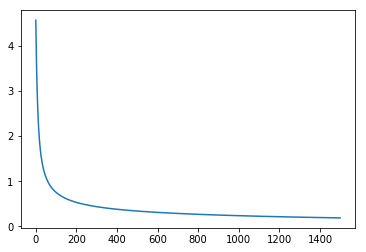

In [6]:
##
## Esta función retorna los pesos óptimos del perceptrón 
## continuo
##
def PercetronCon(x, d, mu=0.0001, niter=100):
    ##
    ## `x` es una matriz donde cada columna es una variable y
    ## cada fila un ejemplo. `d` es un array con
    ## el valor deseado
    ##
    
    ## vector columna de pesos
    w = np.zeros((1 + len(x[0]), 1))
    
    ## agrega una columna de 1s a la matriz x
    x = np.hstack((np.full((len(d), 1), 1), x))
    
    ## convierte la salida deseada a vector columna
    d = d.reshape(len(d), 1)
    
    ## ejecuta la optimización
    history = []
    for iter in range(niter):
        y = x @ w
        y = np.vectorize(lambda x: 1 /(1 + math.exp(-x)))(y)
        s = np.multiply(y, (1 - y))
        e = d - y
        f = np.multiply(s, e)
        f = np.multiply(f, x)
        w = w + (2 * mu * np.sum(f, axis=0)).reshape(len(w), 1)
        history.append(sum([a**2 for a in e]))
    
    return w, history


## entrena el modelo
w, history = PercetronCon(x.reshape(len(x), 1), d, mu=0.001, niter=1500)

## construye la aproximación continua 
x_pred = np.linspace(start=-8, stop=8, num=20)
y_pred = np.hstack((np.full((len(x_pred), 1), 1), x_pred.reshape(len(x_pred), 1))) @ w
y_pred = np.vectorize(lambda u: 1 /(1 + math.exp(-u)))(y_pred)


## grafica de la regresion
plt.plot(x.flatten(), y.flatten(), 'o');
plt.plot(x_pred, y_pred);

## evolución del error
plt.figure()
plt.plot(history);

---
**Ejercicio.--** Complete el siguiente código que permite realizar el entrenamiento de un perceptrón continuo que usa la función sigmoidea como activación.

In [7]:
%clear
class PerceptronBipolar:
    def __init__(self, n):
        """
        n es el numero de entradas a la red 
        """
        pass
    
    def fit(self, x, y, eta=0.01, niter=100):
        """
        x son las entradas, y es la salida esperada
        """
        pass
        
    def predict(self, x):
        """
        Pronostica la salida para una lista de entradas.
        
        >>> x = np.array([-6.1807,   1.9568,   1.7484,   1.9741,   5.7746,
        ...                2.2450,  -7.8481,  -4.2792,   2.6573,   0.2280,
        ...                3.0975,   0.7196,  -3.4763,   6.7749,  -3.3229,
        ...                5.3967,  -3.4204,  -3.7309,  -5.0124,  -4.2844])
        >>> d = np.array([-0.0089,   0.9799,   0.9843,   1.0012,   1.0192, 
        ...                0.9977,  -0.0102,   0.0095,   0.9832,   1.0441,
        ...                1.0027,   0.9886,   0.1155,   1.0092,   0.1478, 
        ...                0.9710,   0.1484,   0.0581,   0.0062,   0.0087])
        >>> m = PerceptronBipolar(2)
        >>> m.fit(x, d)
        >>> x_pred = np.linspace(start=-8, stop=8, num=20)
        >>> m.predict(x_pred)
       
       
        """
        pass
    
if __name__ == "__main__":
    import doctest
    doctest.testmod()

---

**Ejercicio.--** Modifique el código anterior para usar la función $\tanh$ como activación.

---

### Solución representando los cómputos en `TensorFlow`

In [8]:
np.zeros(3)

array([0., 0., 0.])

4.264790271859887
0.5291876038901535
0.3770225089336518
0.30795842199371504
0.2652777663634163


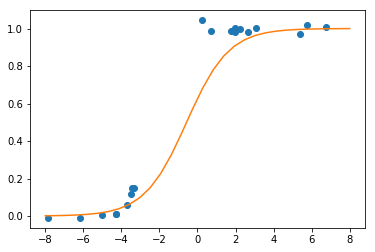

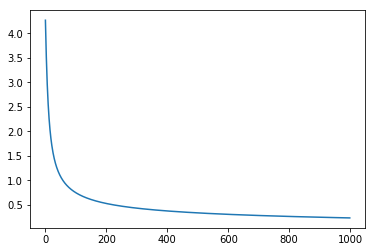

In [45]:
##
## datos del problema propuesto
##
x = np.array([-6.1807,   1.9568,   1.7484,   1.9741,   5.7746,
               2.2450,  -7.8481,  -4.2792,   2.6573,   0.2280,
               3.0975,   0.7196,  -3.4763,   6.7749,  -3.3229,
               5.3967,  -3.4204,  -3.7309,  -5.0124,  -4.2844])
x = x.reshape(len(x), 1)
x = np.hstack((np.full((len(x), 1), 1), x))

d = np.array([-0.0089,   0.9799,   0.9843,   1.0012,   1.0192, 
               0.9977,  -0.0102,   0.0095,   0.9832,   1.0441,
               1.0027,   0.9886,   0.1155,   1.0092,   0.1478, 
               0.9710,   0.1484,   0.0581,   0.0062,   0.0087])
d = d.reshape(len(d), 1)

##
## define las constantes y las variables
##
x_ = tf.constant(x) 
d_ = tf.constant(d) 
w_ = tf.Variable(np.zeros(len(x[0])).reshape(len(x[0]), 1))

##
## calcula el error
##
sse = tf.reduce_sum(tf.square(d_ - tf.nn.sigmoid(tf.matmul(x_, w_))))
    
## Inicializa el optimizador
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
opt = opt.minimize(sse)


##
## pronostico
##
x_pred = np.linspace(start=-8, stop=8, num=30)
x_pred = x_pred.reshape(len(x_pred), 1)
x_pred = np.hstack((np.full((len(x_pred), 1), 1), x_pred)) 
x_pred_ = tf.constant(x_pred)
y_pred_ = tf.nn.sigmoid(tf.matmul(x_pred_, w_))

##
## historia
##
h = []

## estima el modelo
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        sess.run(opt)
        h.append(sse.eval())
        if (i % 200 == 0):
            print(sess.run(sse))        
    
    ## grafica de la regresion
    x_plot = [e[1] for e in x]
    plt.plot(x_plot, y.flatten(), 'o');
    plt.plot([e[1] for e in x_pred], y_pred_.eval())
 
plt.figure()
plt.plot(h);


### Solución representado una red neuronal de una neurona usando `TensorFlow`

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


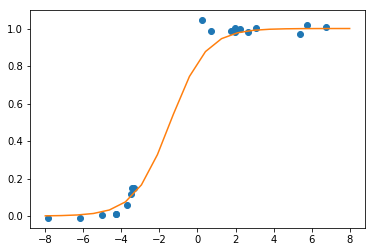

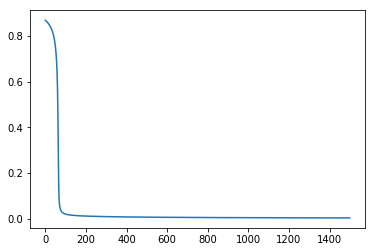

In [46]:
##
## datos del problema propuesto
##
x = np.array([-6.1807,   1.9568,   1.7484,   1.9741,   5.7746,
               2.2450,  -7.8481,  -4.2792,   2.6573,   0.2280,
               3.0975,   0.7196,  -3.4763,   6.7749,  -3.3229,
               5.3967,  -3.4204,  -3.7309,  -5.0124,  -4.2844])
x = x.reshape(len(x), 1)

d = np.array([-0.0089,   0.9799,   0.9843,   1.0012,   1.0192, 
               0.9977,  -0.0102,   0.0095,   0.9832,   1.0441,
               1.0027,   0.9886,   0.1155,   1.0092,   0.1478, 
               0.9710,   0.1484,   0.0581,   0.0062,   0.0087])
d = d.reshape(len(d), 1)

##
## crea la red neuronal
##
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, input_shape = (1,)))
model.summary()          

##
## crea y parametriza el optimizador
##
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

##
## compila el modelo para poder ejecutarlo
##
model.compile(optimizer=optimizer,      ## optimizador
              loss='mse',               ## funcion a minimizar
              metrics=['mse', 'mae'])   ## metricas de error reportadas

##
## entrena el modelo
## 
h = model.fit(x, y,           ## patrones de entrenamiento
              epochs=1500,    ## numero máximo de iteraciones
              verbose=0)      ## sin reporte de la ejecución del optimizador

##
## grafica los datos reales y la regresión
##
plt.plot(x.flatten(), y.flatten(), 'o');
x_pred = np.linspace(start=-8, stop=8, num=30)
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred)

##
## grafica la evolución del error durante
## la optimizacion
##
plt.figure()
plt.plot(h.epoch, np.array(h.history['loss']));

Regresion No Lineal usando un Perceptrón Continuo
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 